In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
d=pd.read_csv('/content/cpdata.csv')
d.head()

,temperature,humidity,ph,rainfall,N,P,K,label,label1
0,20.879744,82.002744,6.502985,202.935536,0.7,0.1,0.8,rice,1
1,21.770462,80.319644,7.038096,226.655537,0.5,0.7,0.4,rice,1
2,23.004459,82.320763,7.840207,263.964248,0.7,0.6,0.1,rice,1
3,26.491096,80.158363,6.980401,242.864034,0.8,0.1,0.7,rice,1
4,20.130175,81.604873,7.628473,262.717340,0.5,0.8,0.2,rice,1


In [ ]:
d.isnull().sum()

temperature    0
humidity       0
ph             0
rainfall       0
N              0
P              0
K              0
label          0
label1         0
dtype: int64

In [ ]:
x=d.iloc[:,0:7]
y=d.iloc[:,-1]
print(x)
print(y)

      temperature   humidity        ph    rainfall    N    P    K
0       20.879744  82.002744  6.502985  202.935536  0.7  0.1  0.8
1       21.770462  80.319644  7.038096  226.655537  0.5  0.7  0.4
2       23.004459  82.320763  7.840207  263.964248  0.7  0.6  0.1
3       26.491096  80.158363  6.980401  242.864034  0.8  0.1  0.7
4       20.130175  81.604873  7.628473  262.717340  0.5  0.8  0.2
...           ...        ...       ...         ...  ...  ...  ...
3095    25.287846  89.636679  6.765095   58.286977  0.1  0.8  0.5
3096    26.638386  84.695469  6.189214   48.324286  0.5  0.1  0.5
3097    25.331045  84.305338  6.904242   41.532187  0.8  0.7  0.6
3098    26.897502  83.892415  6.463271   43.971937  0.5  0.8  0.3
3099    26.986037  89.413849  6.260839   58.548767  0.2  0.8  0.5

[3100 rows x 7 columns]
0        1
1        1
2        1
3        1
4        1
        ..
3095    31
3096    31
3097    31
3098    31
3099    31
Name: label1, Length: 3100, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
re=RandomForestRegressor()
re.fit(x,y)


RandomForestRegressor()

In [ ]:
y_pred=re.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
pr=[[25.80495055,55.00985779,4.789734437,220.2481622,0.2,0.7,0.6]]
re.predict(pr)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([4.])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


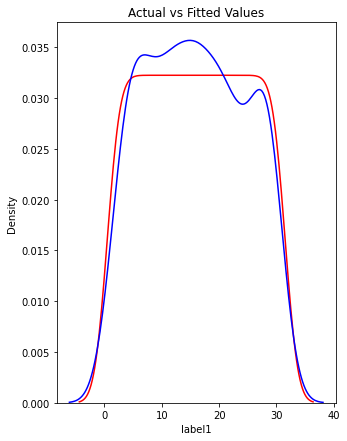

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))
ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values')
plt.show()
plt.close()

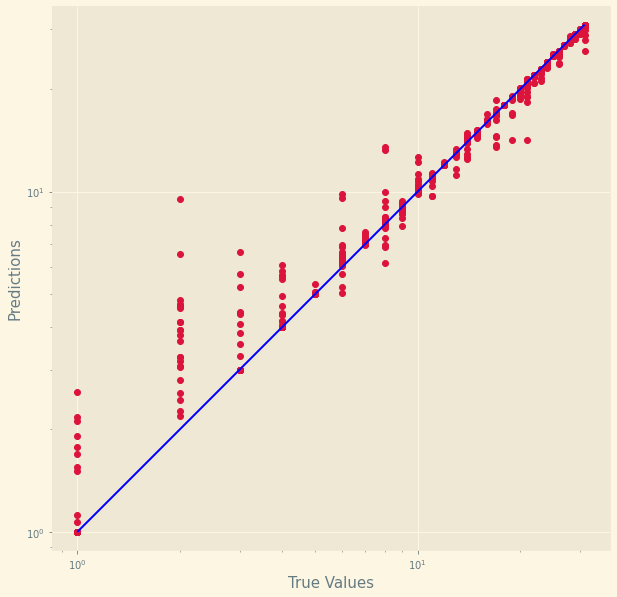

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()